In [49]:
##1a
import numpy as np
import matplotlib.pyplot as plt
from math import sin as sin
from math import cos as cos

# CONSTANTS
g = 9.8    
m = 1.0
# PARAMETERS
ell = 1.0      # length of pendulum arm
theta_0 = 2.0  # initial displacement in radians
               # Note: this is *not* a small angle
omega_0 = 0.0  # initial angular velocity
dt = 0.01      # time sampling spacing
t_final = 10.0 # total number of seconds to run

def f(theta, omega, t):
    
    return omega
    
def h(theta, omega, t):
    return (-g/ell)*sin(theta)

# TIME SLICES (depends on dt and t_final)
tpoints = np.arange(0, t_final, dt)

def time_and_angles():
    """
    Returns three Numpy arrays: 
    1. a list of time samples 
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    """
    
    theta_points = []
    omega_points = []
    ept = []
    # Initialize theta, omega
    theta = theta_0
    omega = omega_0
    e = (1/2)*omega_0**2*m*ell**2 + m*ell*g*(1-cos(theta_0))
    
    for t in tpoints:
        
        # Record theta, omega
        theta_points.append(theta)
        omega_points.append(omega)
        ept.append(e)    
        # Time step using Runge-Kutta
        e = (1/2)*omega**2 + g*(1-cos(theta))
        k1 = dt*f(theta_points[-1],omega_points[-1],t)
        k2 = dt*f(theta_points[-1] + 0.5*k1, omega_points[-1], t + 0.5*dt)
        theta += k2
        
        j1 = dt*h(theta_points[-1],omega_points[-1],t)
        j2 = dt*h(theta_points[-1]+ 0.5*j1, omega_points[-1], t + 0.5*dt)
        omega += j2
        # Note: the arguments of f(...) and h(...) should use 
        # theta_points[-1] and omega_points[-1].
        #
        # This is to ensure that you update theta and omega simultaneously. 
        # For example, if you were doing Euler (correct):
        # omega(i+1) = omega(i) + dt*f(theta(i), omega(i), t)
        #
        # versus (incorrect)
        # omega(i+1) = omega(i) + dt*f(theta(i+1), omega(i), t)

    tt = np.array(tpoints)
    thetas = np.array(theta_points)
    omegas = np.array(omega_points)
    epts = np.array(ept)
    return tt, thetas, omegas, epts 

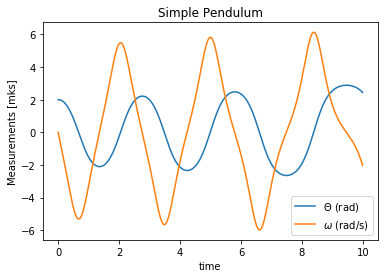

In [50]:
tt, thetas, omegas, epts = time_and_angles()

plt.plot(times, thetas, label='$\Theta$ (rad)')
plt.plot(times, omegas, label='$\omega$ (rad/s)')
plt.title("Simple Pendulum")
plt.xlabel('time')
plt.ylabel('Measurements [mks]')
plt.legend()
plt.show()

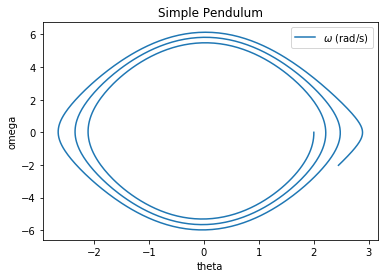

In [51]:
##1b
plt.plot(thetas, omegas, label='$\omega$ (rad/s)')
plt.title("Simple Pendulum")
plt.xlabel('theta')
plt.ylabel('omega')
plt.legend()
plt.show()

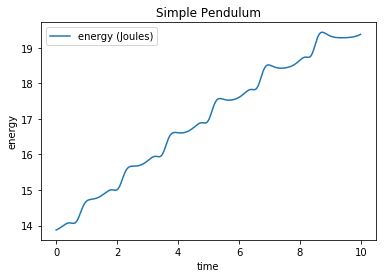

In [52]:
##1c
plt.plot(tt, epts, label='energy (Joules)')
plt.title("Simple Pendulum")
plt.xlabel('time')
plt.ylabel('energy')
plt.legend()
plt.show()

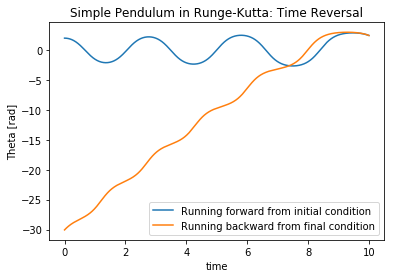

In [54]:
##1d
theta_0 = thetas[-1]
omega_0 = omegas[-1]
dt = -0.01

# we want tpoints to be the "reverse" of what it was in problem 1.a
# so that the last time step appears first, and t=0 appears last
tpoints = tpoints[::-1]

# Now we just run the *same* code from problem 1.a
back_times, back_thetas, back_omegas, back_epts = time_and_angles()

# CLEAN UP
# (Return global values back to their original values)
dt = 0.01  
tpoints = np.arange(0, t_final, abs(dt))

# Compare plots
plt.plot(times, thetas, label='Running forward from initial condition')
plt.plot(back_times, back_thetas, label='Running backward from final condition')
plt.title("Simple Pendulum in Runge-Kutta: Time Reversal")
plt.xlabel('time')
plt.ylabel('Theta [rad]')
plt.legend()
plt.show()

In [55]:
##1e
def time_and_angles_leapfrog():
    """
    Returns three Numpy arrays: 
    1. a list of time samples 
    2. a list of theta values
    3. a list of omega values
    No arguments (these are all assumed to be global variables)
    Uses leap-frog algorithm
    """
    
    theta_points = []
    omega_points = []
    ept2 = []
    # Initialize theta, omega
    theta = theta_0
    omega = omega_0
    e2 = (1/2)*omega_0**2*m*ell**2 + m*ell*g*(1-cos(theta_0))
    
    # Initialize theta, omega "+1/2"
    theta_half = dt*f(theta_0, omega_0, 0)
    omega_half = dt*h(theta_0, omega_0, 0)
    
    
    for t in tpoints:
        # Record theta, omega
        theta_points.append(theta)
        omega_points.append(omega)
        ept2.append(e2)
        a = dt*f(theta_points[-1] + (1/2)*dt*f(theta, omega, t), omega_points[-1] + (1/2)*dt*h(theta, omega, t), t + (1/2)*dt)
        theta += a
        b = dt*h(theta_points[-1] + (1/2)*dt*f(theta, omega, t), omega_points[-1] + (1/2)*dt*h(theta, omega, t), t + (1/2)*dt)
        omega += b
        e2 = (1/2)*omega**2*m*ell**2 + m*ell*g*(1-cos(theta))
    tt = np.array(tpoints)
    thetas = np.array(theta_points)
    omegas = np.array(omega_points)
    ept2s = np.array(ept2)
    return tt, thetas, omegas, ept2s

# Test the above code:
times, thetas_lf, omegas_lf, ept2s = time_and_angles_leapfrog()

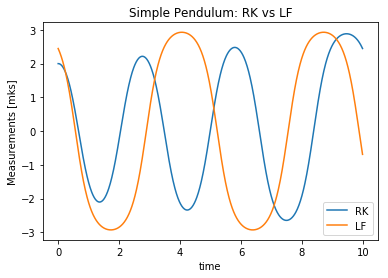

In [59]:
##1f
plt.plot(times, thetas
         , label='RK')
plt.plot(times, thetas_lf
         , label='LF')
plt.title("Simple Pendulum: RK vs LF")
plt.xlabel('time')
plt.ylabel('Measurements [mks]')
plt.legend()
plt.show()

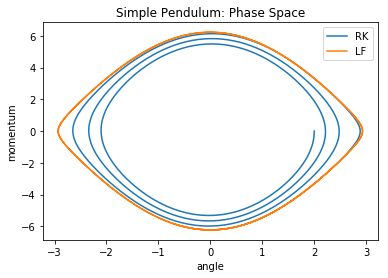

In [58]:
plt.plot(thetas, omegas
         , label='RK')
plt.plot(thetas_lf, omegas_lf
         , label='LF')
plt.title("Simple Pendulum: Phase Space")
plt.xlabel('angle')
plt.ylabel('momentum')
plt.legend()
plt.show()

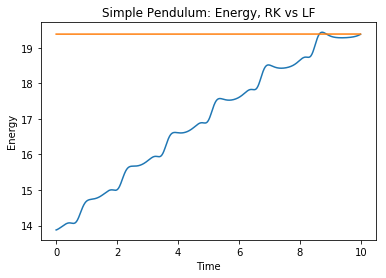

In [62]:
m = 1.0

plt.plot(times, epts
         , label='RK')
plt.plot(times, ept2s
         , label='LF')
plt.title("Simple Pendulum: Energy, RK vs LF")
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()

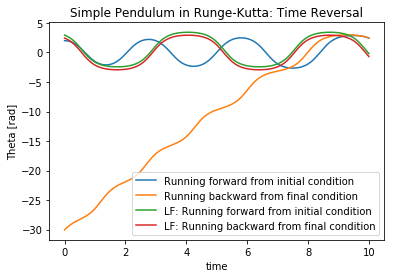

In [66]:
##1g
theta_0 = thetas_lf[-1]
omega_0 = omegas_lf[-1]
dt = -0.01

# old set of time samples, you want tpoints to be the "reverse" of this
tpoints = tpoints[::-1]

back_times, back_thetas_lf, back_omegas_lf, back_ept2s = time_and_angles_leapfrog()

# CLEAN UP
# (Return global values back to their original values)
dt = 0.01  
tpoints = np.arange(0, t_final, abs(dt))

# Define a small offset so that you can see lines
# that would otherwise be overlapping
OFFSET = 0.5

# Compare plots
plt.plot(times, thetas, label='Running forward from initial condition')
plt.plot(back_times, back_thetas, label='Running backward from final condition')
plt.plot(times, thetas_lf + OFFSET, label='LF: Running forward from initial condition')
plt.plot(back_times, back_thetas_lf, label='LF: Running backward from final condition')
plt.title("Simple Pendulum in Runge-Kutta: Time Reversal")
plt.xlabel('time')
plt.ylabel('Theta [rad]')
plt.legend() 
plt.show()

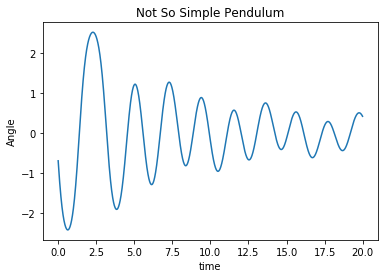

In [77]:
##2
t_final = 20
dt = .01
tpoints = np.arange(0, t_final, dt)

q_damp = 0.1
F_drive = 1.4
omega_drive = 1.0
C_drag = 1.0
rho = 1.225
area = 3.14*0.1**2

# FILL IN THE PARAMETERS OF THE NEW FORCES HERE

# Redefine h to include other forces
def h(theta,omega,t):
    """d(omega)/dt, in the presence of other stuff"""
    SHO = -(g/ell)*sin(theta)
    friction = -q_damp * omega
    drive = F_drive*sin(omega_drive*t)
    drag = -C_drag*rho*area*ell**2*abs(omega)*omega
    return SHO + friction + drive + drag

times, thetas_real, omegas_real, e_real = time_and_angles_leapfrog()
plt.plot(times, thetas_real)
plt.title("Not So Simple Pendulum")
plt.xlabel('time')
plt.ylabel('Angle')
plt.show()

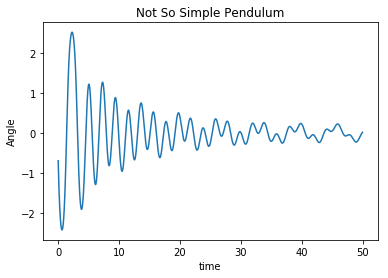

In [78]:
##2b
t_final = 50
dt = .001
tpoints = np.arange(0, t_final, dt)

q_damp = 0.1
F_drive = 1.4
omega_drive = 1.0
C_drag = 1.0
rho = 1.225
area = 3.14*0.1**2

# FILL IN THE PARAMETERS OF THE NEW FORCES HERE

# Redefine h to include other forces
def h(theta,omega,t):
    """d(omega)/dt, in the presence of other stuff"""
    SHO = -(g/ell)*sin(theta)
    friction = -q_damp * omega
    drive = F_drive*sin(omega_drive*t)
    drag = -C_drag*rho*area*ell**2*abs(omega)*omega
    return SHO + friction + drive + drag

times, thetas_real, omegas_real, e_real = time_and_angles_leapfrog()
plt.plot(times, thetas_real)
plt.title("Not So Simple Pendulum")
plt.xlabel('time')
plt.ylabel('Angle')
plt.show()
##It takes around 40 seconds

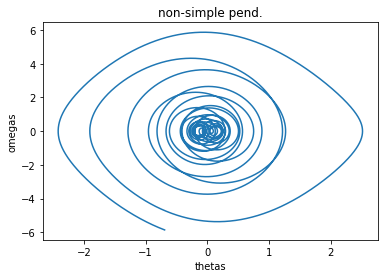

In [79]:
plt.plot(thetas_real,omegas_real)
plt.title("non-simple pend.")
plt.xlabel('thetas')
plt.ylabel('omegas')
plt.show()